In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 60s 0us/step


(50000, 32, 32, 3)

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [16]:
classes[9]

'truck'

In [20]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

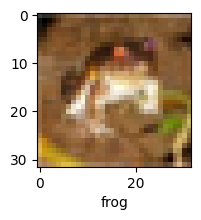

In [21]:
plot_sample(X_train, y_train, 0)

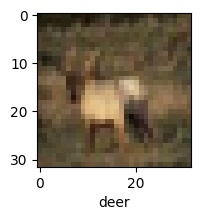

In [22]:
plot_sample(X_train, y_train, 3)

In [23]:
X_train = X_train/255
X_test = X_test/255
#normalising the pixel values

In [24]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.3015 - loss: 1.9370
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.4184 - loss: 1.6417
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4516 - loss: 1.5522
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4752 - loss: 1.4923
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4931 - loss: 1.4364


In [27]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.54      0.55      1000
           1       0.59      0.57      0.58      1000
           2       0.53      0.14      0.23      1000
           3       0.28      0.55      0.37      1000
           4       0.47      0.36      0.41      1000
           5       0.58      0.13      0.21      1000
           6       0.48      0.60      0.53      1000
           7       0.61      0.47      0.53      1000
           8       0.58      0.65      0.61      1000
           9       0.42      0.72      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.45     10000
weighted avg       0.51      0.47      0.45     10000



In [29]:
cnn = models.Sequential([
        #cnn 
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        
        #dense network
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.3727 - loss: 1.7187
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5790 - loss: 1.1987
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6311 - loss: 1.0489
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6626 - loss: 0.9628
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6820 - loss: 0.9138
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7048 - loss: 0.8506
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7235 - loss: 0.7985
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7317 - loss: 0.7696
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7480 - loss: 0.7310
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7600 - loss: 0.6837


In [32]:
cnn.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7082 - loss: 0.8863


[0.89511638879776, 0.7038000226020813]

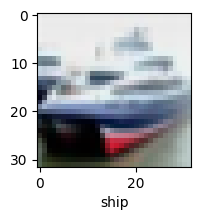

In [34]:
y_test=y_test.reshape(-1,)
plot_sample(X_test, y_test,1)

In [36]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[3.8990713e-04, 9.3894878e-06, 5.2231397e-03, 7.7520859e-01,
        6.7158893e-04, 2.5699109e-02, 5.4262567e-04, 9.8748867e-05,
        1.9193441e-01, 2.2252763e-04],
       [7.7832132e-03, 7.3066764e-02, 1.1606474e-05, 3.0323318e-07,
        2.7105682e-06, 2.6884845e-08, 9.3829344e-10, 3.2097921e-07,
        9.1905850e-01, 7.6565710e-05],
       [5.6597661e-02, 3.3883870e-02, 1.1845544e-02, 5.7386616e-03,
        7.4168108e-03, 7.1649381e-04, 1.0745445e-04, 2.7614104e-02,
        8.4433240e-01, 1.1747103e-02],
       [8.9938879e-01, 3.0298969e-03, 3.6761507e-02, 1.1175490e-03,
        2.8352944e-02, 6.8720867e-05, 1.0727370e-03, 5.2625335e-05,
        3.0025512e-02, 1.2981046e-04],
       [4.6221061e-07, 5.2015062e-06, 4.6243868e-03, 2.5537433e-02,
        1.8148854e-01, 6.1201554e-04, 7.8765857e-01, 3.4797724e-06,
        6.9507842e-05, 3.9847782e-07]], dtype=float32)

In [37]:
np.argmax([5,12,1,2])


1

In [41]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [40]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

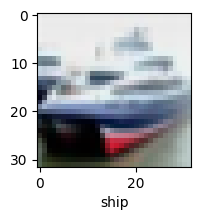

In [42]:
plot_sample(X_test,y_test,1)

In [44]:
classes[y_classes[1]]

'ship'